<a href="https://colab.research.google.com/github/RichardXiao13/Google_Code_In/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get tensorflow 2.0.

In [0]:
%tensorflow_version 2.x

Use tensorflow's functional API.

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

Build the encoder.

In [0]:
input_image = layers.Input(shape=(28, 28, 1))
layer = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(input_image)
layer = layers.Conv2D(32, (3, 3), padding="same", activation="relu")(layer)
layer = layers.MaxPooling2D((2, 2), padding="same")(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.MaxPooling2D((2, 2), padding="same")(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
encode = layers.MaxPooling2D((2, 2), padding="same")(layer)

Build the decoder.

In [0]:
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(encode)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.UpSampling2D((2, 2))(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.Conv2D(16, (3, 3), padding="same", activation="relu")(layer)
layer = layers.UpSampling2D((2, 2))(layer)
layer = layers.Conv2D(32, (3, 3),padding="same", activation="relu")(layer)
layer = layers.Conv2D(32, (3, 3), activation="relu")(layer)
layer = layers.UpSampling2D((2, 2))(layer)
decode = layers.Conv2D(1, (3, 3), padding="same", activation="sigmoid")(layer)

Create the autoencoder and compile it using the ADAM optimizer and binary crossentropy for loss.

In [0]:
autoencoder = keras.models.Model(input_image, decode)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

Import the fashion mnist dataset.

In [0]:
from tensorflow.keras.datasets import fashion_mnist

Load the dataset into a training and validation set.

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Normalize the pixels so that the values of the pixels are between 0 and 1.

In [0]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Train the autoencoder on the dataset with 100 epochs and batches of 150 images. Use the testing set for validation.

In [0]:
history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=150, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3370 - val_loss: 0.2972
Epoch 2/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2916 - val_loss: 0.2910
Epoch 3/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2858 - val_loss: 0.2868
Epoch 4/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2828 - val_loss: 0.2832
Epoch 5/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2804 - val_loss: 0.2813
Epoch 6/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2784 - val_loss: 0.2815
Epoch 7/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2770 - val_loss: 0.2776
Epoch 8/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2755 - val_loss: 0.2770
Epoch 9/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2

Import matplotlib to visualize the decoded images. Input a prediction of 20 images and plot the unprocessed images. Then, plot the processed images below the corresponding unprocessed images.

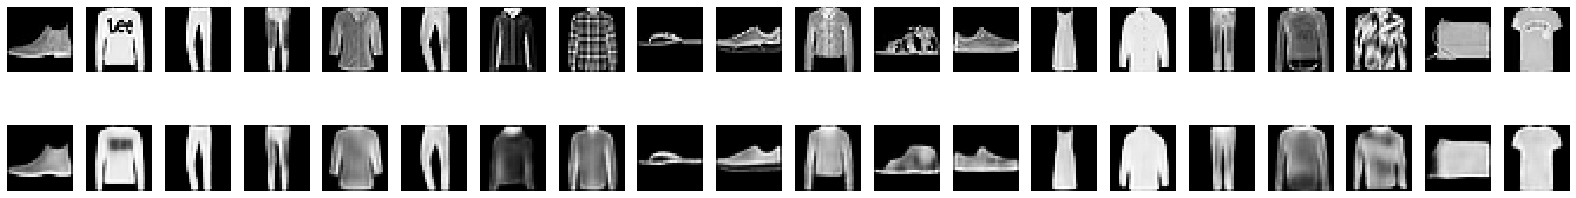

In [0]:
import matplotlib.pyplot as plt

results = autoencoder.predict(x_test[0:20])

plt.figure(figsize=(28, 4))

for i in range(len(results)):
  plt.subplot(2, len(results), i+1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  plt.axis("off")

  plt.subplot(2, len(results), i+1+len(results))
  plt.imshow(results[i].reshape(28, 28))
  plt.gray()
  plt.axis("off")